# 导入数据包

In [1]:
#数据基础操作
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
#画图
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import squarify
from numpy import array
from matplotlib import cm

'''
数据处理包
'''
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from textblob import TextBlob
import datetime as dt
import warnings
import string
import time
stop_words = list(set(stopwords.words('english')))
warnings.filterwarnings('ignore')
punctuation = string.punctuation

# 查看数据

In [2]:
df=pd.read_csv('gun-violence-data_01-2013_03-2018.csv',parse_dates = ['date'])
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
#数据集维度
df.shape

(239677, 29)

In [4]:
#数据为空的数量
df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [5]:
#数据类型
df.dtypes

incident_id                             int64
date                           datetime64[ns]
state                                  object
city_or_county                         object
address                                object
n_killed                                int64
n_injured                               int64
incident_url                           object
source_url                             object
incident_url_fields_missing              bool
congressional_district                float64
gun_stolen                             object
gun_type                               object
incident_characteristics               object
latitude                              float64
location_description                   object
longitude                             float64
n_guns_involved                       float64
notes                                  object
participant_age                        object
participant_age_group                  object
participant_gender                

# 数据预处理

In [6]:
#增加特征
# Create some additional features

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']

try :
    df.drop(['incident_id', 'incident_url', 'source_url', 'incident_url_fields_missing', 'sources','participant_name'], axis=1, inplace=True)
    #去掉2013年数据
    df=df.loc[df['date'].dt.year!=2013]
except :
    print('process finish')

df.head()

,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,year,month,monthday,weekday,loss
278,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,2.0,NaN,NaN,Shots Fired - No Injuries,...,NaN,0::Unharmed,0::Victim,92.0,34.0,2014,1,1,2,0
279,2014-01-01,New Jersey,Newark,Central Avenue,0,0,10.0,NaN,NaN,Officer Involved Incident,...,NaN,NaN,NaN,29.0,29.0,2014,1,1,2,0
280,2014-01-01,New York,Queens,113th Avenue,1,0,5.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)",...,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,33.0,14.0,2014,1,1,2,1
281,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,9.0,NaN,NaN,Shot - Wounded/Injured,...,NaN,0::Injured,0::Victim||1::Subject-Suspect,43.0,20.0,2014,1,1,2,1
282,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,7.0,NaN,NaN,Shot - Wounded/Injured,...,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,131.0,30.0,2014,1,1,2,1


# 一、数据分析
## 1.1暴乱冲突中使用过哪些枪支？

In [7]:
df['gun_type_parsed'] = df['gun_type'].fillna('0:Unknown')
gt = df.groupby(by=['gun_type_parsed']).agg({'n_killed': 'sum', 'n_injured' : 'sum', 'state' : 'count'}).reset_index().rename(columns={'state':'count'})

results = {}
for i, each in gt.iterrows():
    wrds = each['gun_type_parsed'].split("||")
    for wrd in wrds:
        if "Unknown" in wrd:
            continue
        wrd = wrd.replace("::",":").replace("|1","")
        gtype = wrd.split(":")[1]
        if gtype not in results: 
            results[gtype] = {'killed' : 0, 'injured' : 0, 'used' : 0}
        results[gtype]['killed'] += each['n_killed']
        results[gtype]['injured'] +=  each['n_injured']
        results[gtype]['used'] +=  each['count']

gun_names = list(results.keys())
used = [each['used'] for each in list(results.values())]
killed = [each['killed'] for each in list(results.values())]
injured = [each['injured'] for each in list(results.values())]
danger = []
for i, x in enumerate(used):
    danger.append((killed[i] + injured[i]) / x)

trace1 = go.Bar(x=gun_names, y=used, name='SF Zoo', orientation = 'v',
    marker = dict(color = '#EEE8AA', 
        line = dict(color = '#EEE8AA', width = 1) ))
data = [trace1]
layout = dict(height=400, title='Which guns have been used?', legend=dict(orientation="h"));
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='枪支使用情况统计')

可以发现，手枪在枪击事件中用的最多

In [8]:
#时间格式的转换
df_year=df.groupby(['year'])['n_killed','n_injured'].agg('sum')

## 1.2不同地区枪支暴力事件

In [9]:
states_df = df['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
iplot( fig, filename='不同地区枪支暴力事件' )

## 1.3枪支发生年份统计

In [10]:
df_year.head(1)

,n_killed,n_injured
year,,
2014,12557,23002


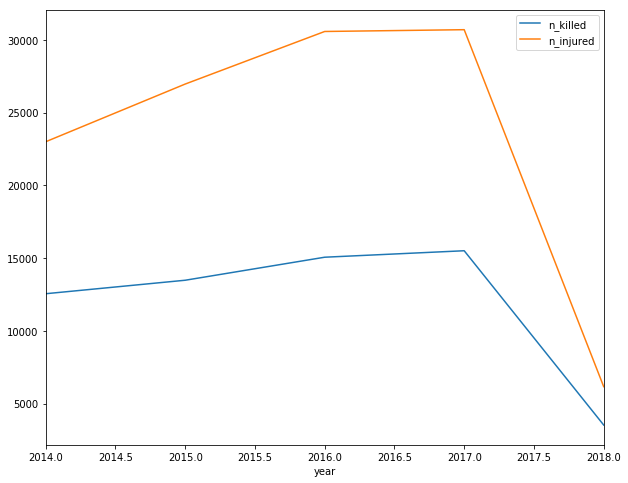

In [11]:
df_year.plot(figsize=(10,8))
plt.show()

In [12]:
df_year=df_year.reset_index()

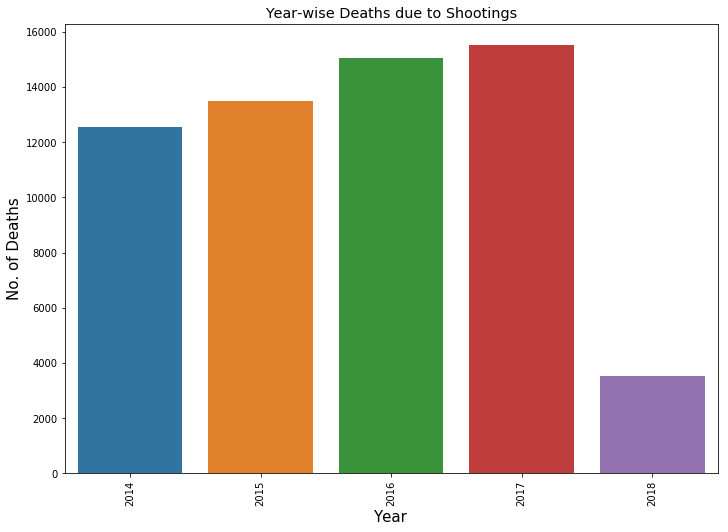

In [13]:

fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=df_year["year"], y=df_year['n_killed'], data=df_year)
f.set_xlabel("Year",fontsize=15)
f.set_ylabel("No. of Deaths",fontsize=15)
f.set_title('Year-wise Deaths due to Shootings')
for item in f.get_xticklabels():
    item.set_rotation(90)
plt.show()

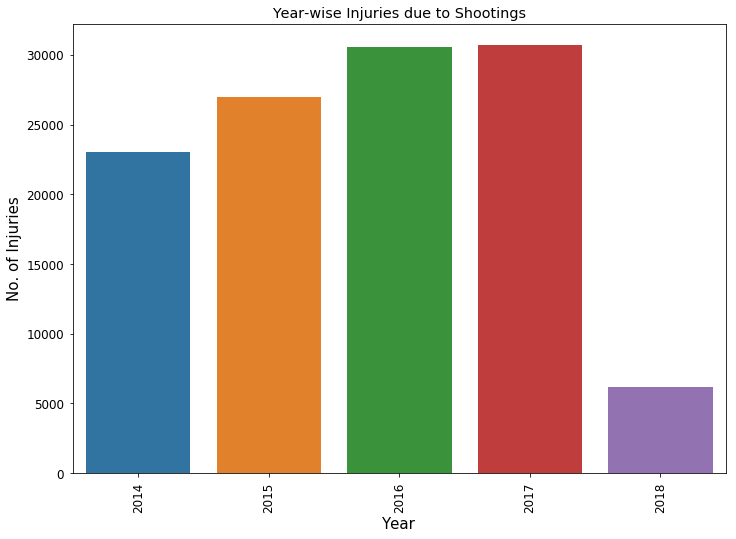

In [14]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=df_year["year"], y=df_year['n_injured'], data=df_year)
f.set_xlabel("Year",fontsize=15)
f.set_ylabel("No. of Injuries",fontsize=15)
f.set_title('Year-wise Injuries due to Shootings')
for item in f.get_xticklabels():
    item.set_rotation(90)
plt.show()

可以看出枪击事件的受害者和死亡人数都呈上升趋势

## 1.4枪支暴力冲突数量最多的前20个州

In [15]:
temp = df["state"].value_counts().head(20)
#temp.iplot(kind='bar', xTitle = 'State name', yTitle = "No. of incidents", title = 'Top 20 States with highest number of Gun Violence',color="Red")trace1

trace_top20=go.Bar(x=temp.index, y=temp.values)
data=[trace_top20]
iplot(data,filename='枪支暴力冲突数量最多的前20个州')

## 1.5每个州在枪击事件中受伤+死亡人数统计

In [16]:
df['loss'] = df['n_killed'] + df['n_injured']
statdf = df.reset_index().groupby(by=['state']).agg({'loss':'sum', 'year':'count'}).rename(columns={'year':'count'})
statdf['state'] = statdf.index

trace1 = go.Bar(
    x=statdf['state'],
    y=statdf['count'],
    name='Count of Incidents',
    marker=dict(color='rgb(255,10,225)'),
    opacity=0.6
)
trace2 = go.Bar(
    x=statdf['state'],
    y=statdf['loss'],
    name='Total Loss',
    marker=dict(color='rgb(58,22,225)'),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    margin=dict(b=150),
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'State wise number of Gun Violence Incidents and Total Loss',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

## 1.6每年枪击事件的时间序列 

In [17]:
# 2014 time series
temp = df[df['year'] == 2014].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2014', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)



# 2015 time series
temp = df[df['year'] == 2015].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2015', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)





# 2016 time series
temp = df[df['year'] == 2016].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2016', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)


# 2017 time series
temp = df[df['year'] == 2017].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2017', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)

发现了一个有意思的事情：  
2014年7月4日 总事件数 : 192, 总受伤人数 : 92,  总死亡人数 : 48  
2015年7月4日 总事件数 : 211, 总受伤人数 : 142, 总死亡人数 : 60  
2016年7月4日 总事件数 : 224, 总受伤人数 : 163, 总死亡人数 : 52  
2017年7月4日 总事件数 : 248, 总受伤人数 : 146, 总死亡人数 : 62  

**7.4日是美国最危险的一天（美国独立日）**

圣诞节、感恩节、劳动节、阵亡将士纪念日，可以看到枪支暴力事件的发生率也明显较高。

## 1.7枪击事件发生地点统计

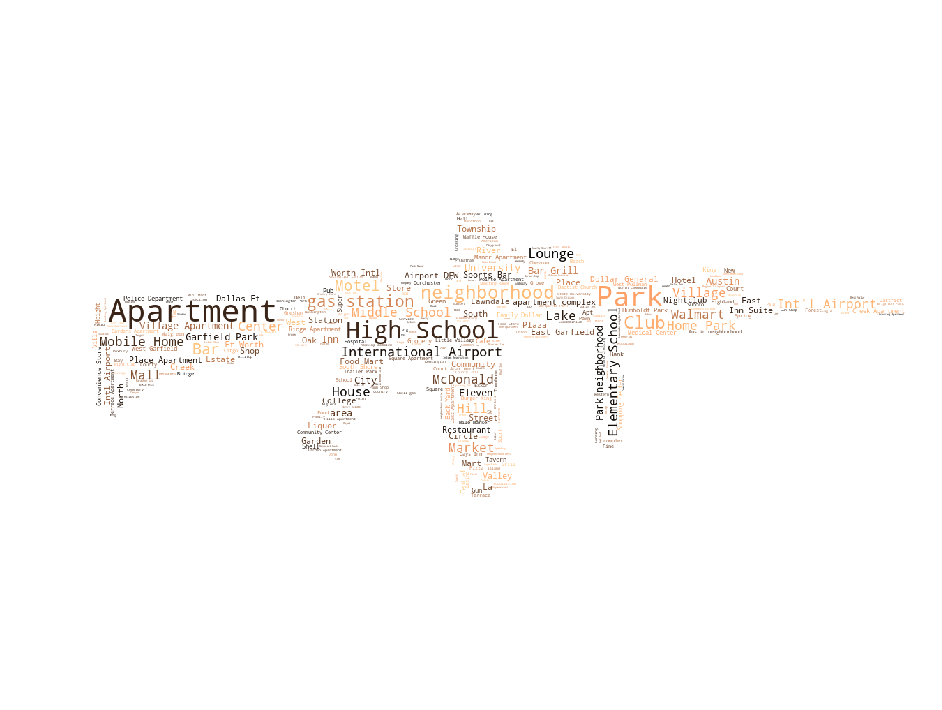

In [18]:
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS
mask = np.array(Image.open('gun2.jpg'))
txt = " ".join(df['location_description'].dropna())
wc = WordCloud(mask=mask, max_words=1200, stopwords=STOPWORDS, colormap='copper', background_color='White').generate(txt)
plt.figure(figsize=(16,18))
plt.imshow(wc)
plt.axis('off')
plt.title('');
plt.show()

枪击事件多发在公寓，公园，高校，机场等地

## 1.8最危险的几次事件统计

In [19]:
df1 = df.sort_values(['loss'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9
113601,2016-02-25,Kansas,Hesston,200 S Ridge Rd,4,14


In [20]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]


dfs = df1.head(20)
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = dfs['longitude'],
        lat = dfs['latitude'],
        text = dfs['city_or_county'],
        mode = 'markers',
        marker = dict(
            size = dfs['loss']/1.5,
            opacity = 0.7,
            cmin = 0,
        ))]

layout = dict(
        title = 'Most Serious Gun Violence Incidents in US',
        colorbar = True,
        geo = dict(
            projection=dict( type='albers usa' ),
            subunitcolor = "rgb(221, 221, 221)",
            subunitwidth = 1.0
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

奥兰多枪击事件发生在2016年，当时约有50人丧生，另外50人受伤，这是过去几年里最严重的事件。最近一次严重的枪击事件发生在2017年11月的德克萨斯州枪击事件，当时有25多人丧生。

## 1.9年龄分布

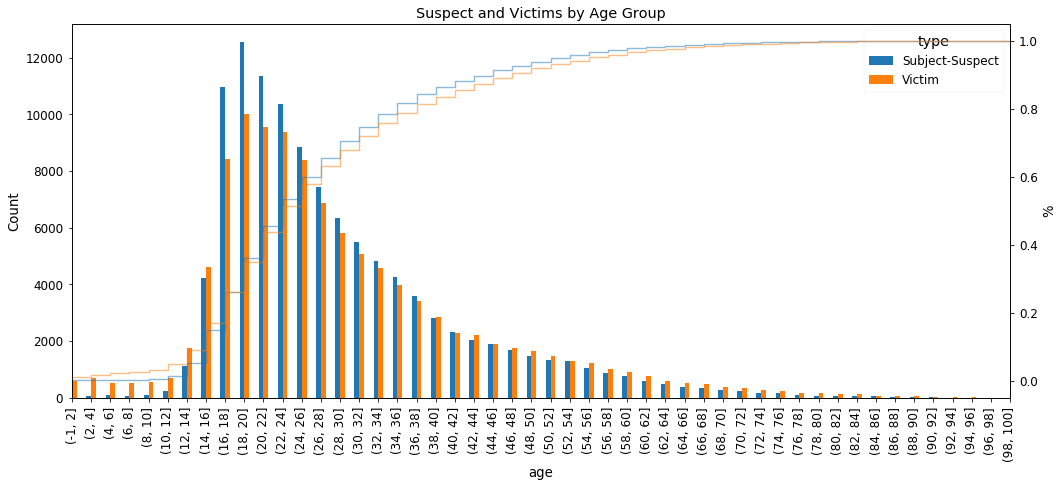

In [21]:
import re 
#Helper function to extract and tabulate text which is of pattern ?::X||
def df_return(lst):
    dic = {}
    ls = []
    for each in lst:
         ls.append(re.findall(r"[^:|]+", str(each)))
    
    for i, each in enumerate(ls):
        if each == ['nan']:
            dic[i] = {0: 'nan'}
        else:
            dic[i] = dict(key_val for key_val in zip(*([iter(each)] * 2)))
    return pd.DataFrame.from_dict({(i,j): dic[i][j] for i in dic.keys() for j in dic[i].keys()},orient='index')    

df_part_age = df_return(df['participant_age']) 
df_part_age.index = pd.MultiIndex.from_tuples(df_part_age.index)
df_part_typ = df_return(df['participant_type']) 
df_part_typ.index = pd.MultiIndex.from_tuples(df_part_typ.index)
df_part = pd.merge(df_part_typ, df_part_age, left_index=True, right_index=True, how='left')
df_part.columns = ['type', 'age']
df_part.fillna(999,inplace=True)
df_part.age.replace('nan', 999, inplace=True)
df_part.age = df_part.age.apply(lambda x : int(x))


part_pd = pd.crosstab(df_part.age, df_part.type)
part_pd.drop(999, inplace=True)
part_pd.drop('nan', axis= 1, inplace=True)
part_pd = part_pd[part_pd.index <= 105] # There is some data entry errors it seems, so we will limit the age to 105 or below
part_pd_bin = part_pd.groupby(pd.cut(part_pd.index, np.arange(0, 102, 2), include_lowest=True, precision=0)).sum()
part_pd_bin.index.name = 'age'
part_pd_bin_sum = part_pd_bin.cumsum(axis=0)

ax1 = part_pd_bin.plot(kind='bar',title = 'Suspect and Victims by Age Group')
ax1.set_ylabel("Count")
ax2 = (part_pd_bin_sum/part_pd_bin_sum.max()).plot(drawstyle='steps',ax= ax1, rot = 90,secondary_y = True,
                                              alpha=0.5,legend=False, figsize=(15,7))
ax2.set_ylabel("%")
plt.tight_layout()
plt.show()

大约40%的受害者和嫌疑犯在15-26岁之间

## 1.10受害者和嫌疑犯最终的状态

In [22]:
df_part_stat = df_return(df['participant_status']) 
df_part_stat.index = pd.MultiIndex.from_tuples(df_part_stat.index)
df_part_2 = pd.merge(df_part_typ, df_part_stat, left_index=True, right_index=True, how='left')
df_part_2.columns = ['type', 'status']
part2_pd = pd.crosstab(df_part_2.status, df_part_2.type)
part2_pd.drop('nan', inplace=True)
part2_pd.drop('nan', axis= 1, inplace=True)

layout = dict(title = "Suspects and Victims Final Status", xaxis = dict(title = 'Status'), yaxis = dict(title = 'Count'))
trace= []
for i, each in enumerate(part2_pd):
    trace.append(go.Bar(x = part2_pd.index, y =part2_pd[each], name= each ))
data = go.Data(trace)
fig = go.Figure(data= data, layout=layout)
iplot(fig)

可以发现，受害者大多被杀害或者受伤，而嫌疑犯大多没有受伤，且很少被击毙

## 1.11统计嫌疑犯和受害者的性别

In [23]:
df_part_gend = df_return(df['participant_gender']) 
df_part_gend.index = pd.MultiIndex.from_tuples(df_part_gend.index)
df_part_3 = pd.merge(df_part_typ, df_part_gend, left_index=True, right_index=True, how='left')
df_part_3.columns = ['type', 'Gender']
part3_pd = pd.crosstab(df_part_3.Gender, df_part_3.type)
part3_pd.drop('nan', inplace=True)
part3_pd.drop('nan', axis= 1, inplace=True)

layout = dict(title = "Suspects and Victims by Gender", xaxis = dict(title = 'Gender'), yaxis = dict(title = 'Count'))
trace= []
for i, each in enumerate(part3_pd):
    trace.append(go.Bar(x = part3_pd.index, y =part3_pd[each], name= each ))
data = go.Data(trace)
fig = go.Figure(data= data, layout=layout)
iplot(fig)

女性受害者多于女性嫌疑犯，男性嫌疑犯多于男性受害者

# 二、数据挖掘
## 2.1预测有多少枪支暴力仍然会发生?

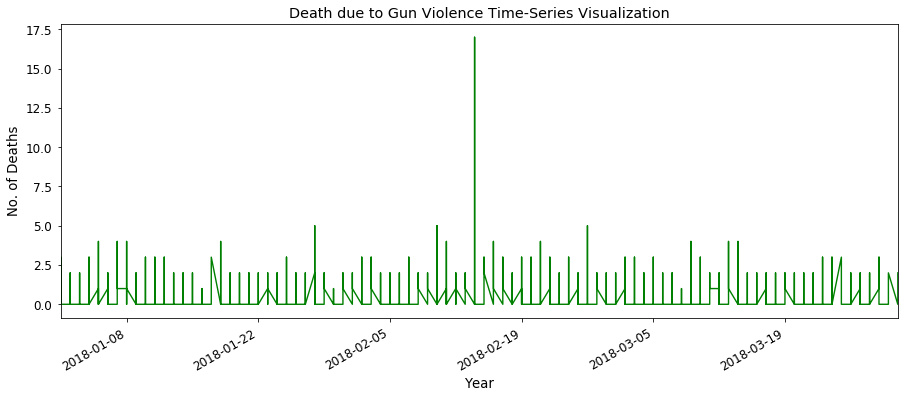

In [24]:
df_18=df.ix[df['year']==2018]
df_ts=df_18[['n_killed','date']]
df_ts.index=df_18['date']
df_ts['n_killed'].plot(figsize=(15,6), color="green")
plt.xlabel('Year')
plt.ylabel('No. of Deaths')
plt.title("Death due to Gun Violence Time-Series Visualization")
plt.show()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


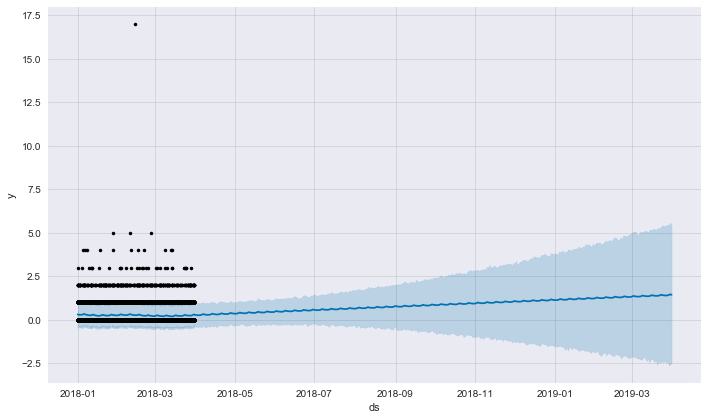

In [25]:
from fbprophet import Prophet
sns.set(font_scale=1) 
df_date_index = df_18[['date','n_killed']]
df_date_index = df_date_index.set_index('date')
df_prophet = df_date_index.copy()
df_prophet.reset_index(drop=False,inplace=True)
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

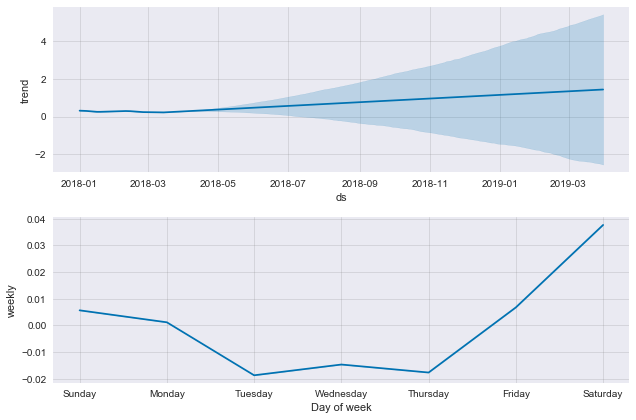

In [26]:
m.plot_components(forecast);
plt.show()

预计2018年的枪击事件数量仍然呈上升趋势，具体在星期五、星期六有较强的上升趋势，应注意防范